In [1]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
import os

# ks2018 = pd.read_csv('data/ks-projects-201801.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [34]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,Country,Currency
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,10,8
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,10,8
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0,10,8
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1,10,8
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0,10,8


In [35]:
train.describe()


,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,Country,Currency
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627,8.973273,7.234461
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334,2.577460,1.947991
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000,10.000000,8.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000,10.000000,8.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000,10.000000,8.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000,10.000000,8.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108126 non-null object
desc                     108120 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 10.8+ MB


In [5]:
def find_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [6]:
find_data(train)


,Total,Percent
desc,9,0.008323
name,3,0.002774
final_status,0,0.000000
backers_count,0,0.000000
launched_at,0,0.000000
created_at,0,0.000000
state_changed_at,0,0.000000
deadline,0,0.000000
currency,0,0.000000
country,0,0.000000


In [7]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

project_id    108129
name          107838
desc          107377
keywords      108129
country           11
currency           9
dtype: int64

In [8]:
trainInfo = train['final_status'].value_counts()


In [9]:
df = pd.DataFrame({'labels': trainInfo.index,
                   'values':trainInfo.values
                  })

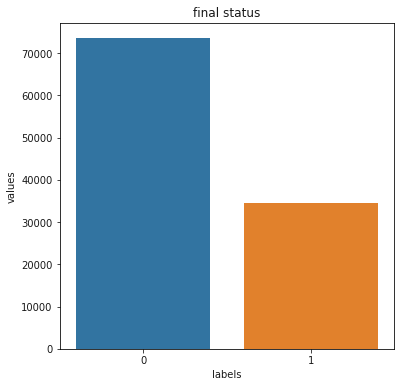

In [10]:
plt.figure(figsize = (6,6))
plt.title('final status')
sns.set_color_codes("colorblind")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

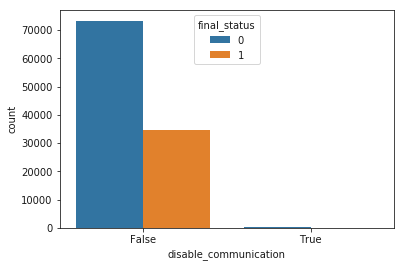

In [11]:
sns.countplot(x='disable_communication',data=train, hue='final_status')

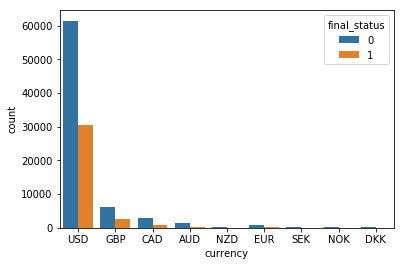

In [2]:
sns.countplot(x='currency',data=train,hue='final_status')

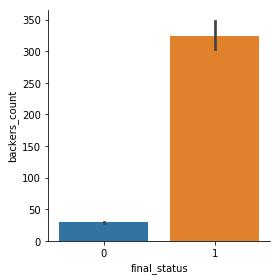

In [3]:
sns.factorplot(x='final_status',data=train,y='backers_count',kind='bar')

In [13]:
# # Create a label encoder object
# le = LabelEncoder()
# le_count = 0

# # Iterate through the columns
# for col in train:
#     if train[col].dtype == 'object':
#         # If 2 or fewer unique categories
#         if len(list(train[col].unique())) <= 2:
#             # Train on the training data
#             le.fit(train[col])
#             # Transform both training and testing data
#             train[col] = le.transform(train[col])
#             test[col] = le.transform(test[col])
            
#             # Keep track of how many columns were label encoded
#             le_count += 1

In [27]:
# # one-hot encoding of categorical variables
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)

# print( train.shape)
# print( test.shape)

In [28]:
# train_labels = train['final_status']

# # Align the training and testing data, keep only columns present in both dataframes
# train, test = train.align(test, join = 'inner', axis = 1)

# # Add the target back in
# train['final_status'] = train_labels

# print( train.shape)
# print(test.shape)

In [19]:
train.dtypes

project_id                object
name                      object
desc                      object
goal                     float64
keywords                  object
disable_communication       bool
country                   object
currency                  object
deadline                   int64
state_changed_at           int64
created_at                 int64
launched_at                int64
final_status               int64
dtype: object

In [14]:
# from sklearn.preprocessing import MinMaxScaler, Imputer

# # Drop the target from the training data
# if 'final_status' in train:
#     trn = train.drop(columns = ['final_status'])
# else:
#     trn = train.copy()
    
# # Feature names
# features = list(trn.columns)

# # Copy of the testing data
# tst = test.copy()

# # Median imputation of missing values
# imputer = Imputer(strategy = 'median')


# # Scale each feature to 0-1
# scaler = MinMaxScaler(feature_range = (0, 1))

# # Fit on the training data
# imputer.fit(trn)

# # Transform both training and testing data
# trn = imputer.transform(trn)
# tst = imputer.transform(test)

# # Repeat with the scaler
# scaler.fit(trn)
# trn = scaler.transform(trn)
# tst = scaler.transform(tst)

# print('Training data shape: ', trn.shape)
# print('Testing data shape: ', tst.shape)

In [19]:
# submit = test[['project_id']]
# submit['final_status'] = predictions

# # Save the submission dataframe
# submit.to_csv('random_forest_baseline.csv', index = False)

In [23]:
# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# train["Country"] = lb_make.fit_transform(train["country"])

# b_make = LabelEncoder()
# test["Country"] = lb_make.fit_transform(test["country"])

# lb_make = LabelEncoder()
# train["Currency"] = lb_make.fit_transform(train["currency"])

# lb_make = LabelEncoder()
# test["Currency"] = lb_make.fit_transform(test["currency"])


In [24]:
# from sklearn.ensemble import RandomForestClassifier


# # Make the random forest classifier
# random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50 )

In [36]:
# # Train on the training data
# random_forest.fit(train, test)

# # Extract feature importances
# feature_importance_values = random_forest.feature_importances_
# feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# # Make predictions on the test data
# predictions = random_forest.predict_proba(test)[:, 14]

In [37]:
train_enc = pd.DataFrame(index= train.index)

In [41]:
for col in tqdm_notebook(train.columns):
    train_enc[col] = train[col].factorize()[0]

In [42]:
dup_col = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i+1 :]:
        if c2 not in dup_col and np.all(train_enc[c1] == train_enc[c2]):
            dup_col[c2]=c1

In [43]:
dup_col

{'keywords': 'project_id'}

In [44]:
train.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [45]:
train['goal'].min()

0.01

In [46]:
test.isnull().sum(axis=0)

project_id               0
name                     0
desc                     4
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
dtype: int64

In [47]:
import datetime


In [48]:
train['deadline'] = pd.to_datetime(train['deadline'],unit='s')
train['state_changed_at'] = pd.to_datetime(train['state_changed_at'],unit='s')
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')
train['launched_at'] = pd.to_datetime(train['launched_at'],unit='s')

In [49]:
#for Before
train['before'] = (train['deadline'] - train['launched_at'])
train['before'] = train['before'].apply(lambda x: (x.total_seconds())/60)


In [50]:
train['state_changed_deadline'] = train['state_changed_at'] - train['deadline']
train['state_changed_deadline'] = train['state_changed_deadline'].apply(lambda x: (x.total_seconds())/60)

In [51]:
train['launched_created'] = train['launched_at'] - train['created_at']
train['launched_created'] = train['launched_created'].apply(lambda x: (x.total_seconds())/60)

In [52]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,before,state_changed_deadline,launched_created
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,12187.933333,0.300000,36.933333
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,24223.466667,50.300000,256.133333
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0,0,14386.033333,4.300000,13.083333
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50,18,1,43150.166667,6.350000,48.916667
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21,1,0,43155.650000,7.283333,43.783333


In [53]:
train['disable_communication'] = train['disable_communication'].astype(int)

In [54]:
train['country'].value_counts()


US    92033
GB     8758
CA     3736
AU     1880
NL      705
NZ      355
SE      240
DK      196
NO      114
IE      111
DE        1
Name: country, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["Country"] = lb_make.fit_transform(train["country"])

In [56]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["Currency"] = lb_make.fit_transform(train["currency"])

In [57]:
train['desc'].isnull().sum()

9

In [58]:
train['Keyword'] = train.keywords.apply(len)

In [59]:
train.fillna('dummy', inplace=True)


In [60]:
drop_columns = ['project_id', 'name', 'desc', 'keywords', 'country', 'currency', 'deadline', 'state_changed_at','created_at', 'launched_at']

In [61]:
train.drop(drop_columns, inplace=True, axis=1)

In [62]:
train.head()

,goal,disable_communication,backers_count,final_status,before,state_changed_deadline,launched_created,Country,Currency,Keyword
0,20.0,0,3,1,12187.933333,0.300000,36.933333,10,8,19
1,300.0,0,2,0,24223.466667,50.300000,256.133333,10,8,74
2,30.0,0,0,0,14386.033333,4.300000,13.083333,10,8,12
3,500.0,0,18,1,43150.166667,6.350000,48.916667,10,8,29
4,2000.0,0,1,0,43155.650000,7.283333,43.783333,10,8,38


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 10 columns):
goal                      108129 non-null float64
disable_communication     108129 non-null int64
backers_count             108129 non-null int64
final_status              108129 non-null int64
before                    108129 non-null float64
state_changed_deadline    108129 non-null float64
launched_created          108129 non-null float64
Country                   108129 non-null int64
Currency                  108129 non-null int64
Keyword                   108129 non-null int64
dtypes: float64(4), int64(6)
memory usage: 8.2 MB


In [64]:
test['deadline'] = pd.to_datetime(test['deadline'],unit='s')
test['state_changed_at'] = pd.to_datetime(test['state_changed_at'],unit='s')
test['created_at'] = pd.to_datetime(test['created_at'],unit='s')
test['launched_at'] = pd.to_datetime(test['launched_at'],unit='s')

#for Before
test['before'] = (test['deadline'] - test['launched_at'])
test['before'] = test['before'].apply(lambda x: (x.total_seconds())/60)

test['state_changed_deadline'] = test['state_changed_at'] - test['deadline']
test['state_changed_deadline'] = test['state_changed_deadline'].apply(lambda x: (x.total_seconds())/60)

test['launched_created'] = test['launched_at'] - test['created_at']
test['launched_created'] = test['launched_created'].apply(lambda x: (x.total_seconds())/60)

test['disable_communication'] = test['disable_communication'].astype(int)

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Country"] = lb_make.fit_transform(test["country"])

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test["Currency"] = lb_make.fit_transform(test["currency"])

test['Keyword'] = test.keywords.apply(len)

In [65]:
drop_columns1 = ['name', 'desc', 'keywords', 'country', 'currency', 'deadline', 'state_changed_at','created_at', 'launched_at']

In [66]:
test.drop(drop_columns1, inplace=True, axis=1)

In [67]:
test.head()

,project_id,goal,disable_communication,before,state_changed_deadline,launched_created,Country,Currency,Keyword
0,kkst917493670,7000.0,0,57660.000000,0.000000,2616.733333,20,12,8
1,kkst1664901914,35000.0,0,50400.000000,0.000000,1904.950000,20,12,16
2,kkst925125077,49500.0,0,51809.533333,0.000000,1512.866667,20,12,43
3,kkst1427645275,40000.0,0,43200.000000,0.200000,24378.133333,20,12,49
4,kkst1714249266,20000.0,0,62232.500000,0.066667,42826.900000,20,12,18


In [68]:
train.drop('backers_count', inplace=True, axis=1)

In [69]:
from sklearn.model_selection import train_test_split

In [74]:
X = train.drop('final_status', axis=1)
y = train['final_status']
training, valid, ytraning, yvalid = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier


# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, max_depth=None , max_features='auto')

TypeError: '<' not supported between instances of 'float' and 'str'